In [40]:
from antsys import AntWorld
from antsys import AntSystem

import matplotlib.pyplot as plt

from bank_schedule.data import Data
from bank_schedule.helpers  import calc_cartesian_coords
from bank_schedule.constants import RAW_DATA_FOLDER

In [36]:
loader = Data(RAW_DATA_FOLDER)
dists = loader.get_distance_matrix()
geo = loader.get_geo_TIDS()
geo.set_index('TID', inplace=True)

In [23]:
all_tids = dists['Origin_tid'].unique().tolist()[:50]
print(all_tids)

TIME_COL = 'Total_Time'
ORIG_COL = 'Origin_tid'
DEST_COL = 'Destination_tid'

def get_distance(orig: int,
                 dest: int) -> list:
    """Get the pheromone value by node

    Args:
        this_node (int): _description_
        next_node (int): _description_
        source (pd.DataFrame): _description_

    Returns:
        float: _description_
    """
    cond = dists[ORIG_COL] == orig
    cond &= dists[DEST_COL] == dest

    return [dists[cond][TIME_COL].values[0]]


def salesman_cost(path):
  cost = 0
  for edge in path:
    cost+=edge.info
  return cost


def salesman_heuristic(path, candidate):
  return candidate.info


new_world = AntWorld(all_tids, get_distance, salesman_cost, salesman_heuristic)

[636538, 607066, 635440, 662968, 667509, 680315, 606139, 619617, 619586, 609468, 629520, 698682, 635206, 634945, 635730, 686165, 619173, 619589, 676489, 609123, 677501, 658891, 406190, 606170, 622459, 619593, 663189, 606515, 658930, 668132, 682749, 635710, 635511, 625034, 629724, 698942, 608021, 639717, 634913, 645368, 676390, 693658, 636033, 695156, 607709, 616681, 686140, 693953, 634828, 659671]


In [49]:
ant_opt = AntSystem(world=new_world, n_ants=200)

In [50]:
ant_opt.optimize(100,10)

| iter |         min        |         max        |        best        |
|     1|             2098.57|             2738.79|             2098.57|
|     2|             2131.98|             2700.05|             2098.57|
|     3|             2022.47|              2693.5|             2022.47|
|     4|             2121.67|             2647.46|             2022.47|
|     5|             2031.91|             2714.41|             2022.47|
|     6|             2095.62|             2715.12|             2022.47|
|     7|             2084.71|             2686.33|             2022.47|
|     8|              2056.3|              2666.9|             2022.47|
|     9|             2023.72|             2661.99|             2022.47|
|    10|             2131.61|             2711.78|             2022.47|
|    11|             2131.51|             2650.86|             2022.47|
|    12|             2061.27|             2662.71|             2022.47|
|    13|             2084.25|             2724.23|             2

In [51]:
res = geo.loc[ant_opt.g_best[1], :]
res_cart = calc_cartesian_coords(res['longitude'], res['latitude'])

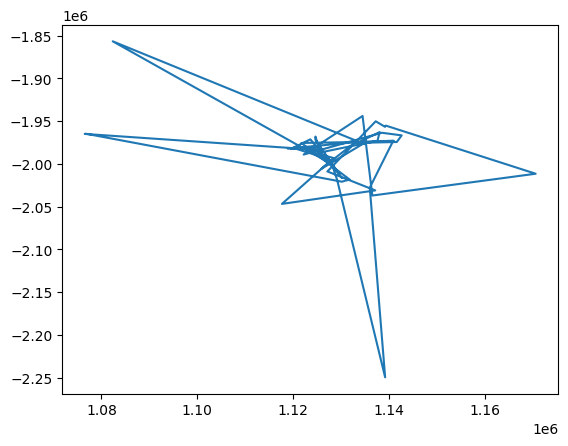

In [52]:
plt.plot(res_cart['x'], res_cart['y'])

In [ ]:
# random_route_time = get_route_time(np.random.permutation(tids_list),
#                                     distance_matrix)
# result_route_time = get_route_time(result,
#                                     distance_matrix)